# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>

# Question 1: Reject option

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

The loss matrix of costs allows us to estimate the expected loss when we assign data points into wrong classes. Our goal is to minimize the expected loss. Under certain condition, we may minimize loss by rejecting to do classification as the costs of wrong classification can be more expensive.

The decision rules for $C1$, $C2$, and $Reject$:
- When $P(C1|x)$ falls between 0 and 0.5, $x$ should be assigned to $C2$
- When $P(C1|x)$ falls between 0.5 and 0.75, $x$ should be rejected to make a decision
- When $P(C1|x)$ falls between 0.75 and 1, $x$ should be assigned to $C1$

The above decision rules can be obtained through solving three linear equations:\
blue line: $y = -4x+4$\
green line:$y = 2x$\
red line: $y=1$
<div>
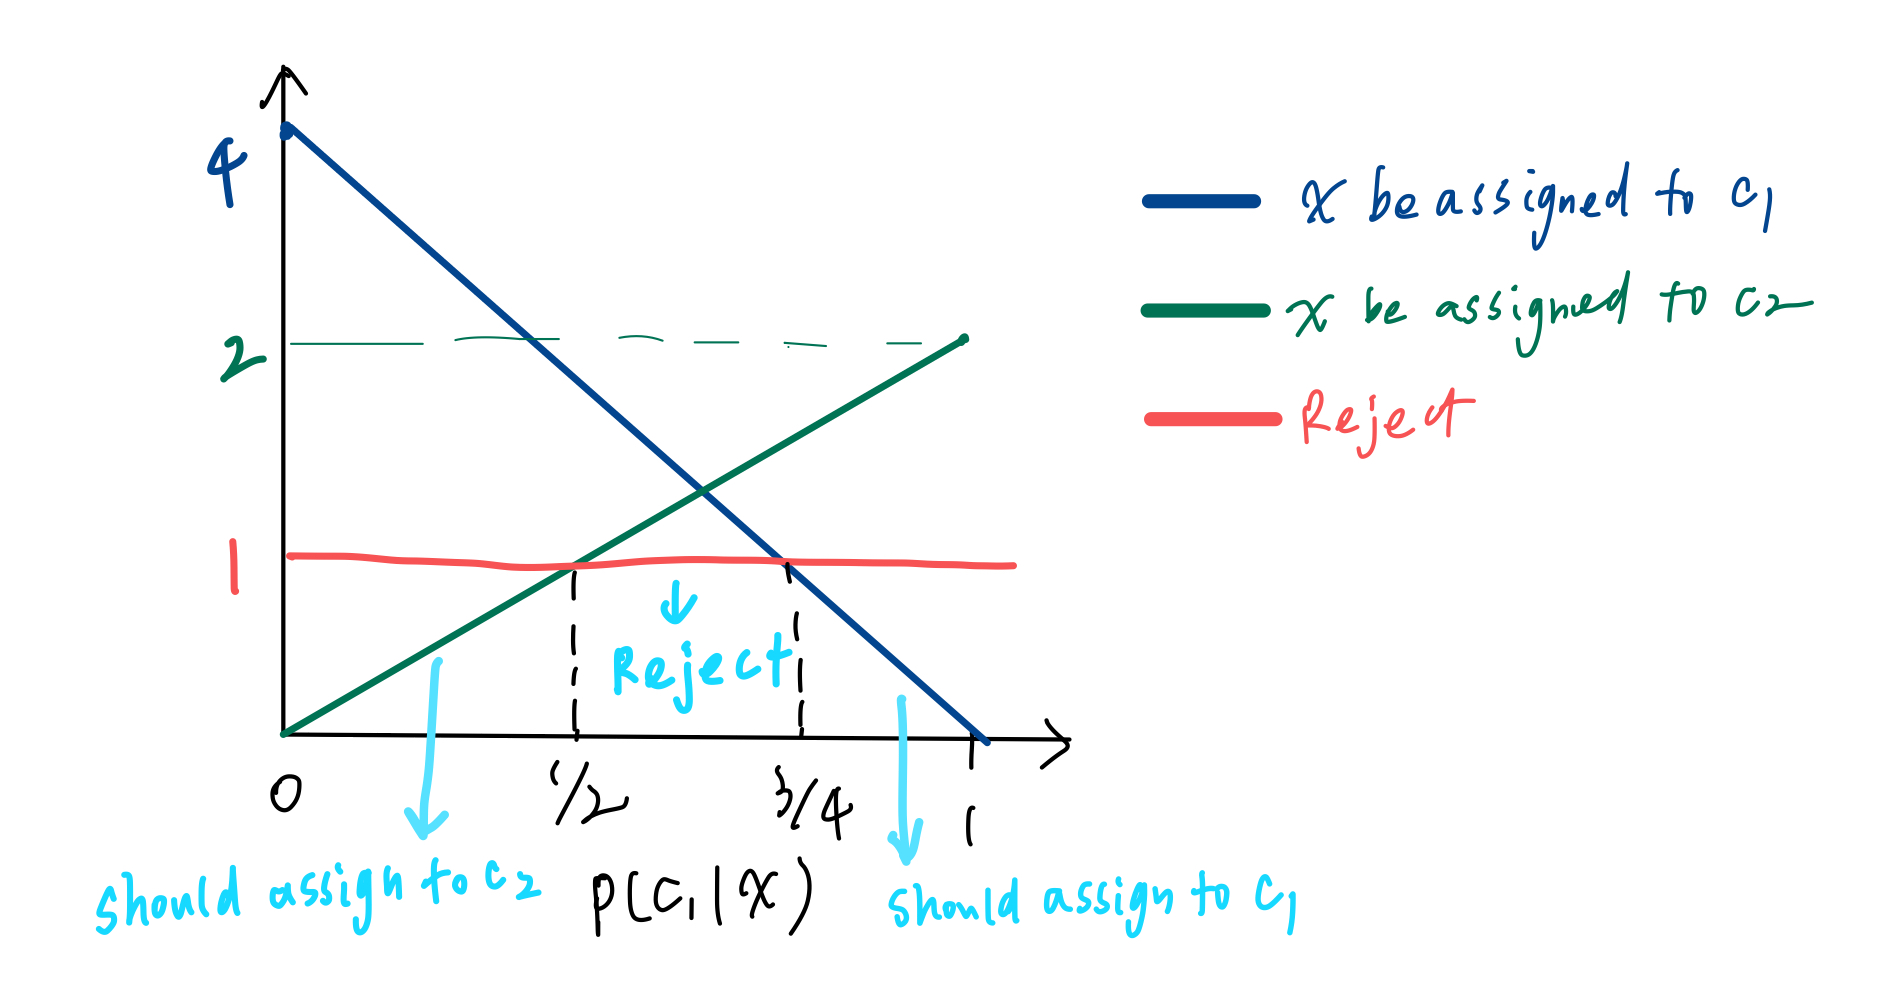
</div>

# Question 2: Logistic Regression

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [1]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

### a)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
y_pred_train = logreg.predict(X_train)
print('Training data')
print(classification_report(y_train, y_pred_train))

y_pred_test = logreg.predict(X_test)
print('Test data')
print(classification_report(y_test, y_pred_test))

Training data
              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Test data
              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



According to above results, we achieve the training accuracy at 0.71. The f-1 score, which is the mean of precision and recall, of class False is 0.83 while that of class True is 0. On the other hand, the test accuracy is slightly smaller than training accuracy, at 0.69. The f-1 score of class False in test data is 0.82 and that of class True is 0 again. This tells us that the regresssion is not able to classify the two classes effectively.

### b)

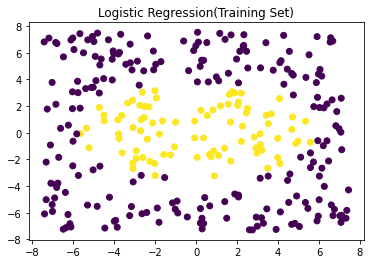

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
       
plt.title('Logistic Regression(Training Set)')
plt.show()

From the plot, we find out that the data points are circular distributed. As a result, to classify two classes effectively, we need to use a classifier which is able to generate circular or elliptical decision boundaries. In this sense, logistic regression classifier appears to be not sufficently good at detecting the correct class of the data points. Logistic classifier is a linear classifier and it divides the space by using one side of hyperplane. This characteristic can also be observed from its formula. The decision boundary of logistic regression is a function of w0 and the dot product of weights and data points.

### c)

In [4]:
X_train_tran = (X_train)**2
X_test_tran = (X_test)**2

logreg2 = LogisticRegression()
logreg2.fit(X_train_tran, y_train)
y_pred2_train = logreg2.predict(X_train_tran)
print('Transformed training data')
print(classification_report(y_train, y_pred2_train))

y_pred2_test = logreg2.predict(X_test_tran)
print('Transformed test data')
print(classification_report(y_test, y_pred2_test))

Transformed training data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       214
        True       0.99      0.99      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Transformed test data
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Regarding to the previous question, to make linear decision boundary effective at classifying, we transform the data points by taking squares. After transforming the data, we acheive training accuracy at 0.99, which is much higher than that before transformation. in training data, the f1-score of class False is 1 and that of class True is 0.99. While for transformed test data, the accuracy is 1 and the f1-scores of both classes are also 1. We can conclude that transforming data help logistic regression perfrom much better.

# Question 3: Bayesian Network

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [5]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:


$$ P(X_A, X_B, X_C, X_D, X_E, X_F) = P(X_A) P(X_B|X_A) P(X_C|X_A,X_E) P(X_D|X_B) P(X_E|X_B) P(X_F|X_C,X_D,X_E) $$

# Question 4: Counterfactuals


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

# Q4-A

In [6]:
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.calibration import calibration_curve, CalibrationDisplay
from matplotlib.gridspec import GridSpec
from sklearn.metrics import accuracy_score
from matplotlib import figure
import copy

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

X = pd.DataFrame(data=X, columns=cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = np.ravel(y_train,)
X['Target'] = y
dataset_Breast = copy.deepcopy(X)
dataset_Breast['Target'] = y

In [7]:
tmp = X[['mean radius', 'mean texture']]

In [8]:
tmp

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [9]:
# Random Forest
rf_bc = RandomForestClassifier(max_depth=3)
rf_bc.fit(X_train, np.ravel(y_train,))
y_pred_train_bc = rf_bc.predict(X_train)
y_pred_test_bc = rf_bc.predict(X_test)
print(accuracy_score(y_train, y_pred_train_bc))
print(accuracy_score(y_test, y_pred_test_bc))

# MLP
mlp_bc = MLPClassifier(max_iter=300)
mlp_bc.fit(X_train, np.ravel(y_train,))
y_pred_train_bc = mlp_bc.predict(X_train)
y_pred_test_bc = mlp_bc.predict(X_test)
print(accuracy_score(y_train, y_pred_train_bc))
print(accuracy_score(y_test, y_pred_test_bc))

# Logistic Regression 
log_bc = LogisticRegression(max_iter=400)
log_bc.fit(X_train, np.ravel(y_train,))
y_pred_train_bc = log_bc.predict(X_train)
y_pred_test_bc = log_bc.predict(X_test)
print(accuracy_score(y_train, y_pred_train_bc))
print(accuracy_score(y_test, y_pred_test_bc))

0.9711286089238845
0.9521276595744681
0.9396325459317585
0.973404255319149
0.958005249343832
0.9574468085106383


### Adult Census

In [10]:
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()

# Split training and test data
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X, y, test_size=0.33, random_state=42)
y_train_ad = np.ravel(y_train_ad,)

In [11]:
# Random Forest
rf_ad = RandomForestClassifier(max_depth=3)
rf_ad.fit(X_train_ad, y_train_ad)
y_pred_train_ad = rf_ad.predict(X_train_ad)
y_pred_test_ad = rf_ad.predict(X_test_ad)
print(accuracy_score(y_train_ad, y_pred_train_ad))
print(accuracy_score(y_test_ad, y_pred_test_ad))

# MLP
mlp_ad = MLPClassifier(max_iter=300)
mlp_ad.fit(X_train_ad, y_train_ad)
y_pred_train_ad = mlp_ad.predict(X_train_ad)
y_pred_test_ad = mlp_ad.predict(X_test_ad)
print(accuracy_score(y_train_ad, y_pred_train_ad))
print(accuracy_score(y_test_ad, y_pred_test_ad))

# Logistic Regression 
log_ad = LogisticRegression()
log_ad.fit(X_train_ad, y_train_ad)
y_pred_train_ad = log_ad.predict(X_train_ad)
y_pred_test_ad = log_ad.predict(X_test_ad)
print(accuracy_score(y_train_ad, y_pred_train_ad))
print(accuracy_score(y_test_ad, y_pred_test_ad))

0.8115058446023379
0.8150009305788201
0.7796011918404767
0.7864321608040201
0.7914737565895026
0.7968546435883119


## Q4-B

### Breast Cancer Plot

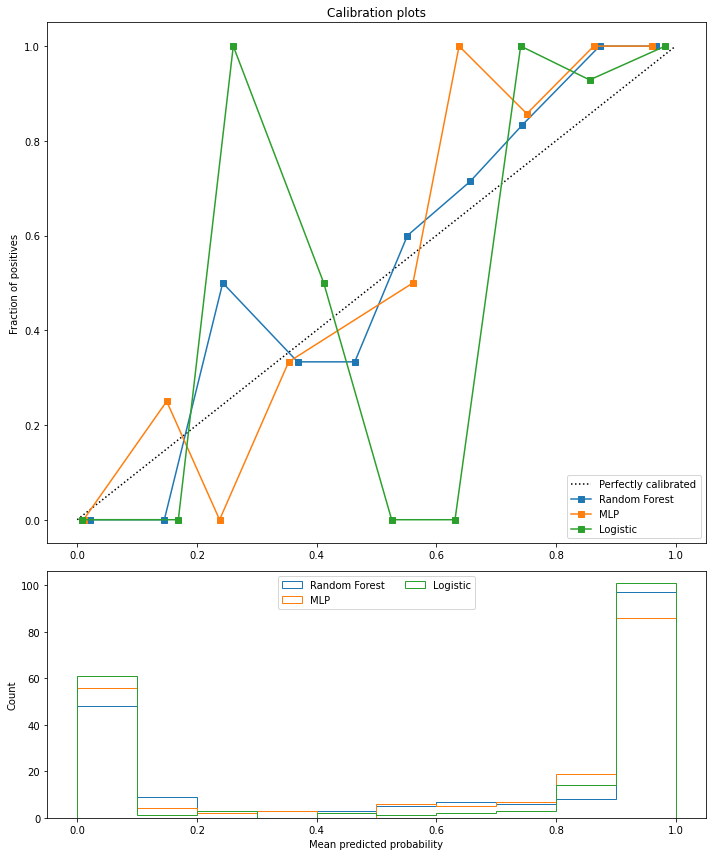

In [12]:
plt.figure(figsize=(10, 12))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name in [(rf_bc, 'Random Forest'), (mlp_bc, 'MLP'), (log_bc, 'Logistic')]:
    clf.fit(X_train, y_train)
    prob_pos = clf.predict_proba(X_test)[:,1]
    frac_of_positives, mean_pred_prob = calibration_curve(y_test, prob_pos, n_bins=10)
    ax1.plot(mean_pred_prob, frac_of_positives, "s-", label=name)
    ax2.hist(prob_pos, range=(0,1), bins=10, label=name, histtype='step')
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots')

ax2.set_xlabel("Mean predicted probability")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

### Adult Census Plot

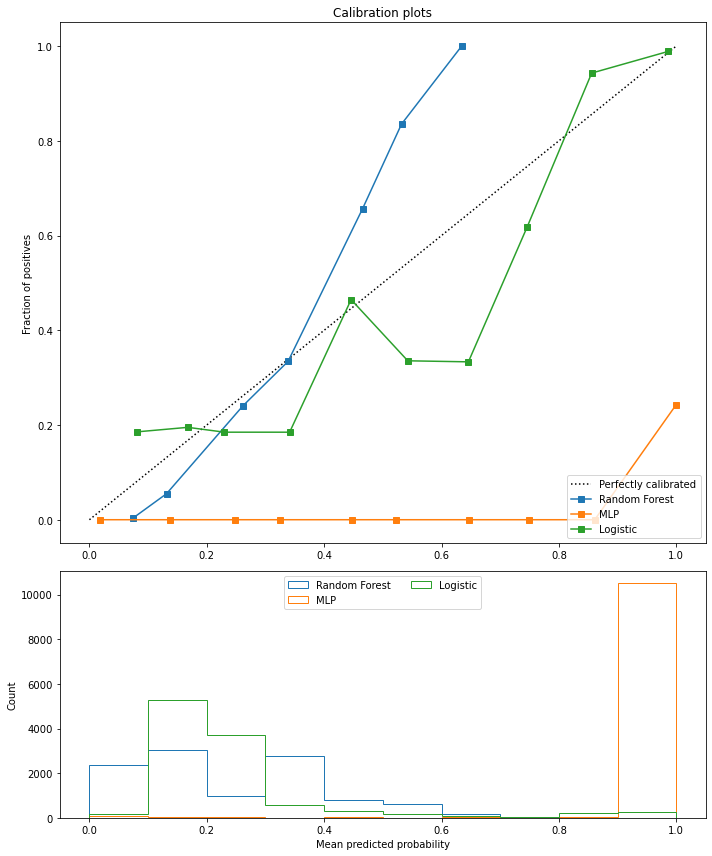

In [13]:
plt.figure(figsize=(10, 12))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name in [(rf_ad, 'Random Forest'), (mlp_ad, 'MLP'), (log_ad, 'Logistic')]:
    clf.fit(X_train_ad, y_train_ad)
    prob_pos = clf.predict_proba(X_test_ad)[:,1]
    frac_of_positives, mean_pred_prob = calibration_curve(y_test_ad, prob_pos, n_bins=10)
    ax1.plot(mean_pred_prob, frac_of_positives, "s-", label=name)
    ax2.hist(prob_pos, range=(0,1), bins=10, label=name, histtype='step')
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots')

ax2.set_xlabel("Mean predicted probability")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()

# Q4-C

In [14]:
# import DiCE
import dice_ml
from dice_ml.utils import helpers  # helper functions

# Tensorflow import
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels import robust

%load_ext autoreload
%autoreload 2

# Generate diverse counterfactuals

## with Breast Cancer Data

### Data Preprocessing

In [15]:
# load the dataset
d = dice_ml.Data(dataframe=dataset_Breast, continuous_features=cols, outcome_name='Target')

target = dataset_Breast["Target"]
# Split data into train and test
datasetX = dataset_Breast.drop("Target", axis=1)
x_train_BC, x_test_BC, y_train_BC, y_test_BC = train_test_split(datasetX, target, test_size=0.33,
                                                    random_state=42, stratify=target)

numerical = cols
categorical = x_train_BC.columns.difference(numerical)

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical),('cat', categorical_transformer, categorical)])

### CF Generation

In [16]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', transformations),('classifier', RandomForestClassifier())])

model = clf.fit(x_train_BC, y_train_BC)

# provide the trained ML model to DiCE's model object
backend = 'sklearn'
m = dice_ml.Model(model=model, backend=backend)

# initiate DiCE; Random Forest
exp_random = dice_ml.Dice(d, m, method="random")
exp_genetic = dice_ml.Dice(d, m, method='genetic')

query_instances = x_test_BC[:15]

# generate counterfactuals
# RandomForest as a baseline
dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)
Genetic_BC_RF = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class=0, verbose=True)

#dice_exp_random.visualize_as_dataframe(show_only_changes=True)

# initiate DiCE; MLP
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', MLPClassifier(max_iter=400))])
model = clf.fit(x_train_BC, y_train_BC)
m = dice_ml.Model(model=model, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
exp_genetic = dice_ml.Dice(d, m, method='genetic')
dice_exp_random_MLP = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)
Genetic_BC_MLP = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class=0, verbose=True)

# initiate DiCE; Logistic Regression
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', LogisticRegression(max_iter=400))])
model = clf.fit(x_train_BC, y_train_BC)
m = dice_ml.Model(model=model, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
exp_genetic = dice_ml.Dice(d, m, method='genetic')
dice_exp_random_LR = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)
Genetic_BC_LR = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class=0, verbose=True)

 20%|████████▊                                   | 3/15 [00:48<03:14, 16.23s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 01 sec


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|██▉                                         | 1/15 [00:00<00:07,  1.92it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|█████▊                                      | 2/15 [00:01<00:06,  1.94it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████▊                                   | 3/15 [00:01<00:06,  1.95it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|███████████▋                                | 4/15 [00:02<00:05,  1.95it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|██████████████▋                             | 5/15 [00:02<00:05,  1.96it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████▌                          | 6/15 [00:03<00:04,  1.96it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|████████████████████▌                       | 7/15 [00:03<00:04,  1.97it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|███████████████████████▍                    | 8/15 [00:04<00:03,  1.98it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|██████████████████████████▍                 | 9/15 [00:04<00:03,  1.97it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|████████████████████████████▋              | 10/15 [00:05<00:02,  1.96it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|███████████████████████████████▌           | 11/15 [00:05<00:02,  1.96it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|██████████████████████████████████▍        | 12/15 [00:06<00:01,  1.94it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|█████████████████████████████████████▎     | 13/15 [00:06<00:01,  1.92it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████▏  | 14/15 [00:07<00:00,  1.93it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|███████████████████████████████████████████| 15/15 [00:07<00:00,  1.96it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec



  0%|                                                    | 0/15 [00:00<?, ?it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|██▉                                         | 1/15 [00:00<00:03,  3.52it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|█████▊                                      | 2/15 [00:00<00:03,  3.55it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████▊                                   | 3/15 [00:00<00:03,  3.57it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|███████████▋                                | 4/15 [00:01<00:03,  3.58it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|██████████████▋                             | 5/15 [00:01<00:02,  3.59it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████▌                          | 6/15 [00:01<00:02,  3.63it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|████████████████████▌                       | 7/15 [00:01<00:02,  3.62it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|███████████████████████▍                    | 8/15 [00:02<00:01,  3.62it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|██████████████████████████▍                 | 9/15 [00:02<00:01,  3.63it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|████████████████████████████▋              | 10/15 [00:02<00:01,  3.65it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|███████████████████████████████▌           | 11/15 [00:03<00:01,  3.66it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|██████████████████████████████████▍        | 12/15 [00:03<00:00,  3.66it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|█████████████████████████████████████▎     | 13/15 [00:03<00:00,  3.65it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████▏  | 14/15 [00:03<00:00,  3.67it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


 20%|████████▊                                   | 3/15 [00:12<00:50,  4.19s/it]

No Counterfactuals found for the given configuration, perhaps try with different parameters... ; total time taken: 00 min 00 sec


  0%|                                                    | 0/15 [00:00<?, ?it/s]

Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|██▉                                         | 1/15 [00:00<00:03,  3.62it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|█████▊                                      | 2/15 [00:00<00:03,  3.63it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████▊                                   | 3/15 [00:00<00:03,  3.64it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|███████████▋                                | 4/15 [00:01<00:03,  3.65it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|██████████████▋                             | 5/15 [00:01<00:02,  3.65it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████▌                          | 6/15 [00:01<00:02,  3.66it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|████████████████████▌                       | 7/15 [00:01<00:02,  3.65it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|███████████████████████▍                    | 8/15 [00:02<00:01,  3.66it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|██████████████████████████▍                 | 9/15 [00:02<00:01,  3.67it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|████████████████████████████▋              | 10/15 [00:02<00:01,  3.65it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|███████████████████████████████▌           | 11/15 [00:03<00:01,  3.63it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|██████████████████████████████████▍        | 12/15 [00:03<00:00,  3.56it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|█████████████████████████████████████▎     | 13/15 [00:03<00:00,  3.49it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████▏  | 14/15 [00:03<00:00,  3.49it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|███████████████████████████████████████████| 15/15 [00:04<00:00,  3.59it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


### Make an object list

In [17]:
obj_list_BC = [dice_exp_random.cf_examples_list, dice_exp_random_MLP.cf_examples_list, 
           dice_exp_random_LR.cf_examples_list, Genetic_BC_RF.cf_examples_list,
           Genetic_BC_MLP.cf_examples_list, Genetic_BC_LR.cf_examples_list]

## With Adult Data

### Data Preprocessing

In [18]:
import pandas as pd
import numpy as np
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
#X.columns
dataset_Adult = X
dataset_Adult['Target'] = y
dataset_Adult = dataset_Adult.astype(int)
cols_adult = list(X.columns[:66])

In [19]:
# load the dataset
d = dice_ml.Data(dataframe=dataset_Adult, continuous_features=cols_adult, outcome_name='Target')

target = dataset_Adult["Target"]
# Split data into train and test
datasetX = dataset_Adult.drop("Target", axis=1)
x_train_adult, x_test_adult, y_train_adult, y_test_adult = train_test_split(datasetX,
                                                    target,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    stratify=target)

numerical = cols_adult
categorical = x_train_adult.columns.difference(numerical)

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical),
        ('cat', categorical_transformer, categorical)])

### CF Generation

In [20]:
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', RandomForestClassifier())])
model = clf.fit(x_train_adult, y_train_adult)
backend = 'sklearn'
m = dice_ml.Model(model=model, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
exp_genetic = dice_ml.Dice(d, m, method='genetic')
query_instances = x_test_adult[:15]
Random_AD_RF = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)
Genetic_AD_RF = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class=0, verbose=True)
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', MLPClassifier(max_iter=400))])
model = clf.fit(x_train_adult, y_train_adult)
m = dice_ml.Model(model=model, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
exp_genetic = dice_ml.Dice(d, m, method='genetic')
Random_AD_MLP = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)
Genetic_AD_MLP = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class=0, verbose=True)
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', LogisticRegression(max_iter=400))])
model = clf.fit(x_train_adult, y_train_adult)
m = dice_ml.Model(model=model, backend=backend)
exp_random = dice_ml.Dice(d, m, method="random")
Random_AD_LR = exp_random.generate_counterfactuals(query_instances, total_CFs=5, 
                                                      desired_class="opposite", verbose=False)
Genetic_AD_LR = exp_genetic.generate_counterfactuals(query_instances, total_CFs=5, desired_class=0, verbose=True)

  0%|                                                    | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|██▉                                         | 1/15 [00:01<00:25,  1.85s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|█████▊                                      | 2/15 [00:03<00:24,  1.85s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████▊                                   | 3/15 [00:05<00:22,  1.84s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|███████████▋                                | 4/15 [00:07<00:20,  1.83s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|██████████████▋                             | 5/15 [00:09<00:18,  1.83s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████▌                          | 6/15 [00:10<00:16,  1.83s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|████████████████████▌                       | 7/15 [00:12<00:14,  1.84s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|███████████████████████▍                    | 8/15 [00:14<00:12,  1.84s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|██████████████████████████▍                 | 9/15 [00:16<00:10,  1.82s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|████████████████████████████▋              | 10/15 [00:18<00:09,  1.80s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|███████████████████████████████▌           | 11/15 [00:20<00:07,  1.81s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|██████████████████████████████████▍        | 12/15 [00:21<00:05,  1.82s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|█████████████████████████████████████▎     | 13/15 [00:23<00:03,  1.83s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████▏  | 14/15 [00:25<00:01,  1.84s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|███████████████████████████████████████████| 15/15 [00:27<00:00,  1.83s/it]

Diverse Counterfactuals found! total time taken: 00 min 01 sec



  0%|                                                    | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|██▉                                         | 1/15 [00:00<00:13,  1.05it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|█████▊                                      | 2/15 [00:01<00:12,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████▊                                   | 3/15 [00:02<00:11,  1.08it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|███████████▋                                | 4/15 [00:03<00:10,  1.08it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|██████████████▋                             | 5/15 [00:04<00:09,  1.08it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████▌                          | 6/15 [00:05<00:08,  1.04it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 01 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|████████████████████▌                       | 7/15 [00:06<00:07,  1.05it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|███████████████████████▍                    | 8/15 [00:07<00:06,  1.05it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|██████████████████████████▍                 | 9/15 [00:08<00:05,  1.05it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|████████████████████████████▋              | 10/15 [00:09<00:04,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|███████████████████████████████▌           | 11/15 [00:10<00:03,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|██████████████████████████████████▍        | 12/15 [00:11<00:02,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|█████████████████████████████████████▎     | 13/15 [00:12<00:01,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████▏  | 14/15 [00:13<00:00,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|███████████████████████████████████████████| 15/15 [00:14<00:00,  1.06it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec



  0%|                                                    | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


  7%|██▉                                         | 1/15 [00:00<00:13,  1.07it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 13%|█████▊                                      | 2/15 [00:01<00:12,  1.07it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 20%|████████▊                                   | 3/15 [00:02<00:11,  1.07it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 27%|███████████▋                                | 4/15 [00:03<00:10,  1.06it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 33%|██████████████▋                             | 5/15 [00:04<00:09,  1.07it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 40%|█████████████████▌                          | 6/15 [00:05<00:08,  1.08it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 47%|████████████████████▌                       | 7/15 [00:06<00:07,  1.09it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 53%|███████████████████████▍                    | 8/15 [00:07<00:06,  1.09it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 60%|██████████████████████████▍                 | 9/15 [00:08<00:05,  1.10it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 67%|████████████████████████████▋              | 10/15 [00:09<00:04,  1.10it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 73%|███████████████████████████████▌           | 11/15 [00:10<00:03,  1.10it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 80%|██████████████████████████████████▍        | 12/15 [00:10<00:02,  1.11it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 87%|█████████████████████████████████████▎     | 13/15 [00:11<00:01,  1.11it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


 93%|████████████████████████████████████████▏  | 14/15 [00:12<00:00,  1.11it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Diverse Counterfactuals found! total time taken: 00 min 00 sec
Initializing initial parameters to the genetic algorithm...
Initialization complete! Generating counterfactuals...


100%|███████████████████████████████████████████| 15/15 [00:13<00:00,  1.10it/s]

Diverse Counterfactuals found! total time taken: 00 min 00 sec


In [21]:
obj_list_AD = [Random_AD_RF.cf_examples_list,Random_AD_MLP.cf_examples_list,
              Random_AD_LR.cf_examples_list, Genetic_AD_RF.cf_examples_list,
              Genetic_AD_MLP.cf_examples_list, Genetic_AD_LR.cf_examples_list]

In [22]:
obj_total = [dice_exp_random.cf_examples_list, dice_exp_random_MLP.cf_examples_list, 
           dice_exp_random_LR.cf_examples_list, Genetic_BC_RF.cf_examples_list,
           Genetic_BC_MLP.cf_examples_list, Genetic_BC_LR.cf_examples_list,
             Random_AD_RF.cf_examples_list,Random_AD_MLP.cf_examples_list,
              Random_AD_LR.cf_examples_list, Genetic_AD_RF.cf_examples_list,
              Genetic_AD_MLP.cf_examples_list, Genetic_AD_LR.cf_examples_list]

# Score Matrices

## Validity

$\frac{| \ Unique \ instances \ in \ C \ s.t. f(c) > 0.5 \ |}{k}$

* f(c) is the result of the model (Role of threshold)
* k is the total number of CF generated

In [23]:
# In principle, the condition that the f(c) is larger than threshold
# should be included. however, as here the order of y_test and original case by which
# CFs are generated does not match, i omitted it. 
# For more information it can be supplemented later.

def dice_validity(dice_obj, n_test=15):
    valid_bin = []
    for i in range(n_test):
        tmp = dice_obj[i].final_cfs_df
        # In case of no CF has been generated
        try:
            unique = tmp.drop_duplicates()
            valid_bin.append((len(unique) / len(tmp)))
        except:
            continue
    return sum(valid_bin) / len(valid_bin)

## Proximity

**Disatance**

dist_cont(c,x) = $\frac{1}{d_{cont}} \sum_{p=1}^{d_{cont}} \frac{|c^p-x^p|}{MAD_p}$ 

* x<sup>p</sup>:  p-th input
* d<sub>cont</sub>: # of continuous variable
* MAD<sub>p</sub>: Median Absolute Deviation for p-th continuous variable
* Here, the distance is l1 distance

dist_cat(c,x) = $\frac{1}{d_{cat}} \sum_{p=1}^{d_{cat}} I(c^p \neq x^p)$ 


**Proximity**

Continuous Proximity = $-\frac{1}{k}$ $\sum_{i = 1}^{k}$ dist_cont(c<sub>i</sub>,**x**)

= $-\frac{1}{kd_{cont}}\sum_{i = 1}^{k}$ $\sum_{p=1}^{d_{cont}}\frac{|c^p-x^p|}{MAD_p}$


In [24]:
import numpy as np
from statsmodels import robust

def dice_proximity(dice_obj, MAD_df, n_test=15):

    dist_bin = []
    dist_larger_bin = []
    dist_largest = []
    MAD = list(MAD_df.apply(robust.mad))
    n_col = len(dice_obj[0].test_instance_df.columns) - 1
    for i in range(n_test):
        cf = dice_obj[i].final_cfs_df
        test = dice_obj[i].test_instance_df
        try: # if cf exists
            len(cf)
            for j in range(len(cf)):
                for k in range(n_col):
                    if MAD[k] ==0:
                        MAD[k] = 1
                    dist_bin.append(abs(cf.iloc[j,k] - test.iloc[0,k]) / MAD[k])
                dist_larger_bin.append(sum(dist_bin)/n_col)
                dist_bin = []
            dist_largest.append(-sum(dist_larger_bin) / len(cf))
            dist_larger_bin = []
        except:
            continue
    return round(sum(dist_largest)/len(dist_largest), 4)

## Diversity

**Diversity**: $\Delta$ = $\frac{1}{C_k^2} \sum_{i = 1}^{k-1} \sum_{j = i+1}^{k}$ dist(c<sub>i</sub>, c<sub>j</sub>)

**Distance**:  dist_cont(c,x) = $\frac{1}{d_{cont}} \sum_{p=1}^{d_{cont}} \frac{|c^p-x^p|}{MAD_p}$ 

In [25]:
import math

def dice_diversity(dice_obj, MAD_df):

    dist_bin = []
    dist_larger_bin = []
    MAD = list(MAD_df.apply(robust.mad))
    for i in range(15):
        cf = dice_obj[i].final_cfs_df
        try:
            len(cf)
            n_row = len(cf)
            n_col = len(cf.columns)
            for j in range(n_row):
                for r in range(j+1,n_row):
                    for p in range(n_col-1):
                        if MAD[p]==0:
                            MAD[p]=1
                        dist_bin.append(abs(cf.iloc[j][p] - cf.iloc[r][p]) / MAD[p])
                    dist_larger_bin.append(sum(dist_bin) / len(dist_bin))
                    dist_bin = []
        except:
            continue
    return round(sum(dist_larger_bin) / len(dist_larger_bin), 4)

## Sparcity

1 - $\frac{1}{kd} \sum_{i=1}^{k}\sum_{l=1}^{d}$1<sub>[$c_i^l \neq x_i^l$]</sub>

* k: # of CF generated
* d: # of Features

In [26]:
def dice_sparcity(dice_obj):

    sparcity_bin = 0
    spar_larger_bin = []
    n_col = len(dice_obj[0].test_instance_df.columns) -1
    for i in range(15):
        cf = dice_obj[i].final_cfs_df 
        test = dice_obj[i].test_instance_df
        try:
            len(cf)
            for j in range(len(cf)):
                for r in range(n_col):
                    if test.iloc[0][r] != cf.iloc[j][r]:
                        sparcity_bin += 1
            tmp_spar = sparcity_bin/(n_col * len(cf))
            spar_larger_bin.append(1 - tmp_spar)
            sparcity_bin = 0 
        except:
            continue
    return round(sum(spar_larger_bin) / len(spar_larger_bin), 4)

## In-distributionness

In [27]:
from sklearn.metrics.pairwise import rbf_kernel

def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = rbf_kernel(X, X, gamma)
    YY = rbf_kernel(Y, Y, gamma)
    XY = rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

In [28]:
def dice_mmd(obj):
    mmd=[]
    for i in range(len(obj)):
            cf = obj[i].final_cfs_df
            test = obj[i].test_instance_df
            try:
                mmd.append(get_mmd_rbf(cf, test, gamma=1.0))
            except:
                continue
    return round(sum(mmd)/len(mmd), 4)

## Validity

In [29]:
validity=[]
for i in obj_total:
    validity.append(dice_validity(i))

## Proximity

In [30]:
proximity=[]
for i in obj_list_BC:
    proximity.append(dice_proximity(i, x_train_BC))
for j in obj_list_AD:
    proximity.append(dice_proximity(j, x_train_adult))

## Diversity

In [31]:
diversity=[]
for i in obj_list_BC:
    diversity.append(dice_diversity(i, x_train_BC))
for j in obj_list_AD:
    diversity.append(dice_diversity(j, x_train_adult))

## Sparcity

In [32]:
sparcity = []
for i in obj_total:
    sparcity.append(dice_sparcity(i))

## In-distribution

In [33]:
mmd = []
for i in obj_total:
    mmd.append(dice_mmd(i))

## Final Result

In [34]:
con = np.zeros((12,5))
col = ['Validity', 'Proximity', 'Diversity', 'Sparcity', 'In-dist']
idx = ['Random_BC_RF','Random_BC_MLP','Random_BC_LR','Genetic_BC_RF','Genetic_BC_MLP',
      'Genetic_BC_LR','Random_AD_RF', 'Random_AD_MLP','Random_AD_LR','Genetic_AD_RF',
       'Genetic_AD_MLP','Genetic_AD_LR']
dice_result = pd.DataFrame(con)
dice_result.columns = col
dice_result.index = idx

In [35]:
for i in range (len(validity)):
    dice_result.iloc[i,0] = validity[i]
    dice_result.iloc[i,1] = proximity[i]
    dice_result.iloc[i,2] = diversity[i]
    dice_result.iloc[i,3] = sparcity[i]
    dice_result.iloc[i,4] = mmd[i]

In [36]:
dice_result

,Validity,Proximity,Diversity,Sparcity,In-dist
Random_BC_RF,1.0,-0.8475,0.9989,0.8019,1.2472
Random_BC_MLP,1.0,-0.6515,0.7799,0.9071,1.1366
Random_BC_LR,1.0,-0.7142,0.9766,0.9181,1.1389
Genetic_BC_RF,1.0,-0.8687,0.7233,0.0724,1.0939
Genetic_BC_MLP,1.0,-0.8064,0.6612,0.0813,1.0409
Genetic_BC_LR,1.0,-0.8644,0.6976,0.0982,1.0674
Random_AD_RF,1.0,-453.2568,292.4253,0.9719,1.1873
Random_AD_MLP,1.0,-470.2953,320.6187,0.9782,1.1614
Random_AD_LR,1.0,-482.6378,338.9587,0.9760,1.1816
Genetic_AD_RF,1.0,-40.3155,8.2797,0.9119,0.9057


As the adult dataset contains many categorical varaibles which also contain a number of category, the resulting dataframe generated by get_dummies function would be sparse. 

That might make the MAD of some variables zero, the thing that makes us to arbirarily set the MAD value to 1 as has been done by the counterfactual generator during the optimization process.